In [1]:
%matplotlib inline

In [2]:
import numpy as np
import plotly.plotly as py
from plotly.graph_objs import *
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Load the data
nc = xr.open_dataset('data/G10010_SIBT1850_v1.1.nc')

print(nc)

<xarray.Dataset>
Dimensions:        (latitude: 240, longitude: 1440, time: 1968)
Coordinates:
  * latitude       (latitude) float32 89.875 89.625 89.375 89.125 88.875 ...
  * longitude      (longitude) float32 0.125 0.375 0.625 0.875 1.125 1.375 ...
  * time           (time) datetime64[ns] 1850-01-15 1850-02-15 1850-03-15 ...
Data variables:
    seaice_conc    (time, latitude, longitude) float32 99.2614 99.2614 ...
    seaice_source  (time, latitude, longitude) float32 21.0 21.0 21.0 21.0 ...
Attributes:
    CDI:                       Climate Data Interface version 1.6.2 (http://c...
    Conventions:               CF-1.4
    nco_openmp_thread_number:  1
    CDO:                       Climate Data Operators version 1.6.2 (http://c...
    NCO:                       4.4.2
    version:                   1.0
    release_date:              December_30,_2015
    history:                   Updated G10010_SIBT1850.nc; Enforced consisten...
    filename:                  G10010_SIBT1850_v1.01i


In [4]:
# See what dates we have
nc.time

<xarray.DataArray 'time' (time: 1968)>
array(['1850-01-15T00:00:00.000000000', '1850-02-15T00:00:00.000000000',
       '1850-03-15T00:00:00.000000000', ..., '2013-10-15T00:00:00.000000000',
       '2013-11-15T00:00:00.000000000', '2013-12-15T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1850-01-15 1850-02-15 1850-03-15 ...
Attributes:
    standard_name:  time

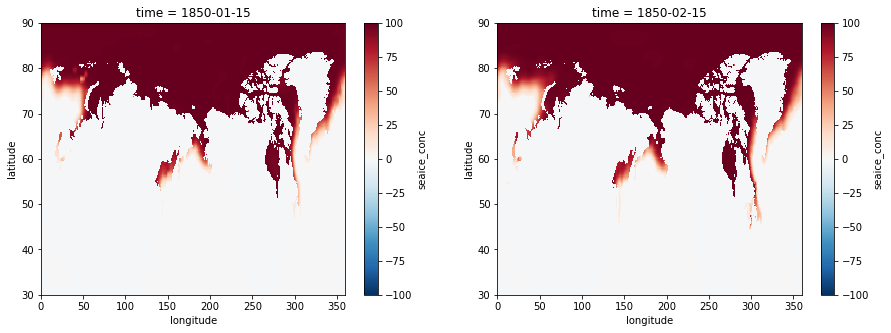

In [5]:
# Take a look at seaice_conc by plotting
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
nc.seaice_conc[0].plot(ax=ax1)
nc.seaice_conc[1].plot(ax=ax2)

In [6]:
# Save seaice_conc to netcdf for saving computational resources
nc.seaice_conc.to_netcdf(path='data/seaice_conc.nc')
nc.close()

In [7]:
# Load seaice_conc
ds = xr.open_dataset('data/seaice_conc.nc', chunks={'time': 12})

In [14]:
mo_avg = ds.groupby('time.month').mean()
yr_avg = ds.groupby('time.year').mean()

yr_df = yr_avg.seaice_conc.to_dataframe()
yr_df = yr_df.reset_index()
mo_df = mo_avg.seaice_conc.to_dataframe()
mo_df = mo_df.reset_index()

In [133]:
seasons = ds.groupby('time.season').mean('latitude').mean('longitude')
se_df = seasons.to_dataframe()
se_df = se_df.groupby([lambda x: x.year, 'season']).mean()

In [135]:
se_df.head(n=12)

seaice_conc
     season             
1850 DJF       27.071581
     JJA       22.740520
     MAM       27.802505
     SON       21.496418
1851 DJF       27.708517
     JJA       23.405031
     MAM       27.766159
     SON       21.515066
1852 DJF       27.508780
     JJA       23.959085
     MAM       27.905249
     SON       22.181715

In [132]:
x.head()

seaice_conc
     season             
1850 DJF       27.071581
     JJA       22.740520
     MAM       27.802505
     SON       21.496418
1851 DJF       27.708517

In [9]:
import plotly.plotly as py
import plotly.graph_objs as go
from datetime import datetime

In [25]:
se_df.head()

seaice_conc
season latitude longitude             
DJF    89.875   0.125        99.787170
                0.375        99.787170
                0.625        99.787186
                0.875        99.787186
                1.125        99.787201